In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df=pd.read_csv('person.csv')
df

,Person,height(in feet),weight(in lbs),foot size(in inches)
0,male,6.00,180,12
1,male,5.92,190,11
2,male,5.58,170,12
3,male,5.92,165,10
4,female,5.00,100,6
5,female,5.50,150,8
6,female,5.42,130,7
7,female,5.75,150,9


In [5]:
df.shape

(8, 4)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Person                8 non-null      object 
 1   height(in feet)       8 non-null      float64
 2   weight(in lbs)        8 non-null      int64  
 3   foot size(in inches)  8 non-null      int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 388.0+ bytes


In [9]:
df.isnull().sum()

Person                  0
height(in feet)         0
weight(in lbs)          0
foot size(in inches)    0
dtype: int64

In [11]:
X=df.iloc[:,1:]
X

,height(in feet),weight(in lbs),foot size(in inches)
0,6.00,180,12
1,5.92,190,11
2,5.58,170,12
3,5.92,165,10
4,5.00,100,6
5,5.50,150,8
6,5.42,130,7
7,5.75,150,9


In [13]:
y=df.iloc[:,0]
y

0      male
1      male
2      male
3      male
4    female
5    female
6    female
7    female
Name: Person, dtype: object

In [15]:
X.corr()

,height(in feet),weight(in lbs),foot size(in inches)
height(in feet),1.000000,0.909442,0.803875
weight(in lbs),0.909442,1.000000,0.919178
foot size(in inches),0.803875,0.919178,1.000000


<Axes: >

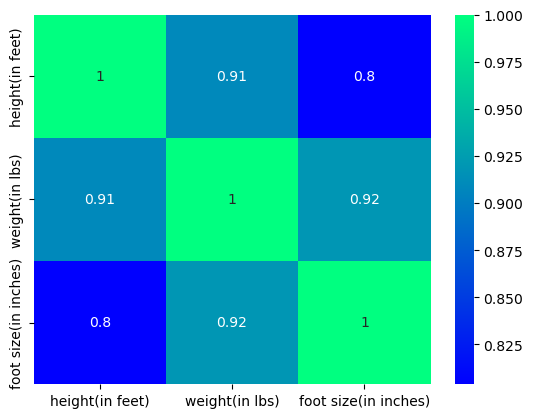

In [19]:
import seaborn as sns
sns.heatmap(X.corr(),annot=True,cmap='winter')

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33,random_state=0)

In [23]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [25]:
from sklearn.svm import SVC
sv_cla=SVC(kernel='linear',random_state=0)
sv_cla.fit(X_train,y_train)

SVC(kernel='linear', random_state=0)

In [27]:
ypredict=sv_cla.predict(X_test)
ypredict

array(['female', 'male', 'male'], dtype=object)

In [29]:
from sklearn.metrics import confusion_matrix
cmsv=confusion_matrix(y_test,ypredict)
cmsv

array([[1, 0],
       [0, 2]], dtype=int64)

In [31]:
from sklearn import metrics
print('Accuracy:',metrics.accuracy_score(y_test,ypredict))

Accuracy: 1.0


Comparing the Real Values with Predicted Values

In [37]:
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':ypredict})
df

,Real Values,Predicted Values
6,female,female
2,male,male
1,male,male


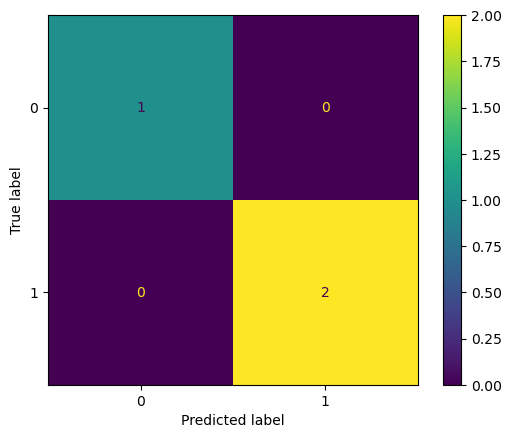

In [39]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(cmsv).plot()
plt.show()

for all svm kernels

In [41]:
from sklearn import svm
for k in ['linear','poly','rbf','sigmoid']:
    clf=svm.SVC(kernel=k)   #clf=SVC(kernel=k)
    clf.fit(X_train,y_train)
    confidence=clf.score(X_test,y_test)
    print(k,confidence)

linear 1.0
poly 0.6666666666666666
rbf 1.0
sigmoid 1.0


In [43]:
from sklearn.svm import SVC
cla=SVC(kernel='rbf',random_state=0)
cla.fit(X_train,y_train)

SVC(random_state=0)

In [45]:
y_predict=cla.predict(X_test)
y_predict

array(['female', 'male', 'male'], dtype=object)

In [47]:
from sklearn.metrics import confusion_matrix
cmsvk=confusion_matrix(y_test,y_predict)
cmsvk

array([[1, 0],
       [0, 2]], dtype=int64)

In [49]:
from sklearn import metrics
print('Accuracy:',metrics.accuracy_score(y_test,y_predict))

Accuracy: 1.0
